In [1]:
import time


def compare_runtime(configuration: dict, algorithms: list[tuple[str, any]]):
    results = {}
    for alg_name, alg in algorithms:
        start_time = time.process_time()
        alg(**configuration)
        end_time = time.process_time()
        results[alg_name] = end_time - start_time
    return results

In [6]:
import causalpathalgorithms

algorithms = [
    ("PaCo", causalpathalgorithms.PaCo),
    ("PaCo2", causalpathalgorithms.PaCo2),
    ("Baseline", causalpathalgorithms.pathpy_causal_paths),
]

In [3]:
import utils

(_, college_msg_edge_set) = utils.read_time_stamped_csv(
    "data/college-msg.csv", "datetime"
)

In [4]:
import pandas as pd

pd.set_option("display.width", 2000)

In [ ]:
import datetime
import pandas as pd


def exp_runtime(dataset_sorted_edges):

    # dictionary containing parameter keys and the values that we want to test. Each value is a tuple containing
    # the readable format and the real parameter
    alg_parameter_ranges = {
        "sorted_edges": range(50, 1001, 50),
        "delta_time": range(10, 60, 10),
        "max_path_length": range(1, 5),
    }
    alg_parameter_defaults = {
        "sorted_edges": 1000,
        "delta_time": 30,
        "max_path_length": 4,
    }
    parameter_preprocessors = {
        "sorted_edges": lambda n: dataset_sorted_edges[:n],
        "delta_time": lambda m: datetime.timedelta(minutes=m),
    }

    results = []

    for param_key in alg_parameter_ranges.keys():
        for param_value in alg_parameter_ranges[param_key]:
            # Merge defaults with current iteration
            readable_params = alg_parameter_defaults | {param_key: param_value}

            # Apply processing to readable parameters to create proper parameters like an edge set or timedelta object
            processed_params = readable_params.copy()
            for processor_key, processor in parameter_preprocessors.items():
                processed_params[processor_key] = processor(
                    readable_params[processor_key]
                )

            runtimes_dict = compare_runtime(processed_params, algorithms)
            current_result = runtimes_dict | {"experiment": param_key} | readable_params
            results.append(current_result)

    return results


runtime_exp_results = exp_runtime(college_msg_edge_set)
runtime_exp_results_df = pd.DataFrame(runtime_exp_results)
print(runtime_exp_results_df[runtime_exp_results_df["experiment"] == "delta_time"])

        PaCo     PaCo2  Baseline  experiment  sorted_edges  delta_time  max_path_length
20  0.010278  0.006206  0.024648  delta_time          1000          10                4
21  0.016826  0.006348  0.031065  delta_time          1000          20                4
22  0.022275  0.006519  0.038440  delta_time          1000          30                4
23  0.027393  0.006113  0.044331  delta_time          1000          40                4
24  0.032607  0.006385  0.049439  delta_time          1000          50                4


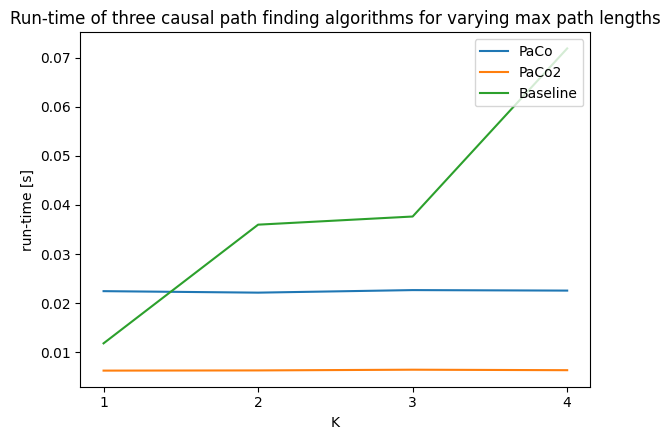

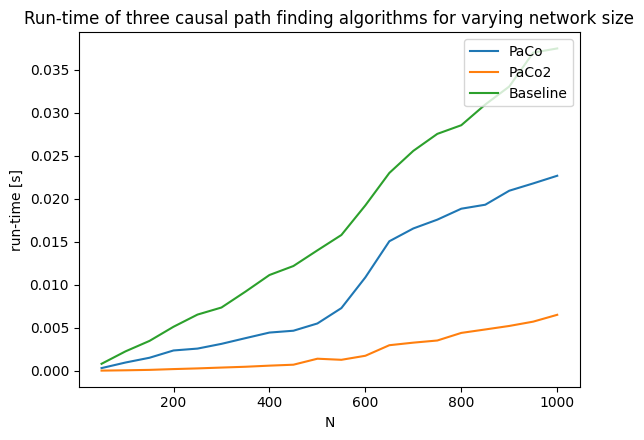

In [ ]:
from matplotlib import pyplot as plt


def plot_K(df):
    n_df = df[df["experiment"] == "max_path_length"]
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for algorithm, _ in algorithms:
        plt.plot(n_df["max_path_length"], n_df[algorithm], label=algorithm)
    plt.xlabel("K")
    plt.xticks(n_df["max_path_length"])
    plt.ylabel("run-time [s]")
    plt.legend(loc="upper right")
    plt.title(
        "Run-time of three causal path finding algorithms for varying max path lengths"
    )

    plt.tight_layout()
    plt.show()


def plot_N(df):
    n_df = df[df["experiment"] == "sorted_edges"]
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for algorithm, _ in algorithms:
        plt.plot(n_df["sorted_edges"], n_df[algorithm], label=algorithm)
    plt.xlabel("N")
    plt.ylabel("run-time [s]")
    plt.legend(loc="upper right")
    plt.title(
        "Run-time of three causal path finding algorithms for varying network size"
    )

    plt.tight_layout()
    plt.show()


def plot_dt(df):
    n_df = df[df["experiment"] == "delta_time"]
    plt.figure(figsize=(2 ^ 4, (3 * (2 ^ 4)) / 4))
    for algorithm, _ in algorithms:
        plt.plot(n_df["delta_time"], n_df[algorithm], label=algorithm)
    plt.xlabel("delta_time [min]")
    plt.ylabel("run-time [s]")
    plt.legend(loc="upper right")
    plt.title("Run-time of three causal path finding algorithms for varying delta time")

    plt.tight_layout()
    plt.show()


plot_K(runtime_exp_results_df)
plot_N(runtime_exp_results_df)
plot_dt(runtime_exp_results_df)